In [49]:
%reload_ext autoreload
%autoreload 2

from common_imports import *

# CMT of a single atom

In [44]:
system = Ps_system(N_points=20,T=100)
sequence = laser_sequence()
rabi0 = 2*np.pi*(600e-3)
chirp = 2*np.pi*(2500e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 1
#system.init_distribution_MB()
system.init_distribution_singular()

acc_kwargs = {               
    "scale":1000,
    "rabi0" : rabi0,
    "pulse_duration" : pulse_duration,
    "start":0,
    "end":int(3*pulse_duration)
    }

N_pulses_in_train = 5

for i in range(N_pulses_in_train):
    acc_kwargs["label"]="cooling"+str(i)
    acc_kwargs["unit_wavevector"] = (-1)**i*direction
    acc_kwargs["detuning0"] = (-1)**i*detuning
    acc_kwargs["chirp"] = (-1)**i*chirp
    sequence.init_pulse(acc_kwargs)

In [45]:
handler = data_handler()
sorted_sequence = sequence.pull_sorted_sequence()
opts = qt.Options(store_states=True)
saved_states = []
results = []
stds = []
expect_ph = []
for laser in sorted_sequence:
    laser = laser[1]
    print("Simulating {} ....".format(laser.label))
    if laser.isSE == True:
        SE_rate = 1 # 1ps corresponds to 3ns in this time-window
    else:
        SE_rate = None
    system.create_composite(laser,SE_rate)
    if laser.order == 0:
        system.init_states_ground() # important to have ground state initiating after creating internal state space...
        states = system.states
        #saved_states.append(states)
    system.set_Hamiltonian_MT_general_laser(laser)
    result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = states,e_ops = system.e_ops,c_ops=system.c_ops,options=opts)
    states = result.states[-1]
    
    std = handler.expect_standard_deviation(states,system.N_points)
    stds.append(std)

    #selector = qt.tensor(qt.qeye(system.N_points),qt.Qobj([[0,0,0],[0,0,0],[0,0,1]]))
    #expect_ph.append((states*selector).tr())
    #print("std: {}".format(std))
    
    results.append(result)
    #saved_states.append(states)
print("Done!")

Simulating cooling0 ....
Simulating cooling1 ....
Simulating cooling2 ....
Simulating cooling3 ....
Simulating cooling4 ....
Done!


[0.0e+00 1.5e-07 3.0e-07 4.5e-07 6.0e-07]


UsageError: Line magic function `%plt.savefig("./figures/thesis_draft/cmt_acc_atom_0.svg")` not found.


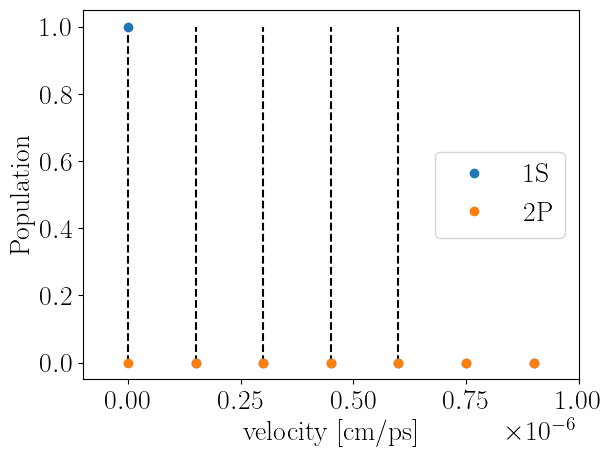

In [48]:
fig,ax = plt.subplots()
system.organise_result(results[0])
length = system.velocity_bins.size
plt.vlines(system.velocity_bins[length//2:length//2+5],ymin=0,ymax=1,ls="dashed",color="black")
print(system.velocity_bins[length//2:length//2+5])
ax.plot(system.velocity_bins,system.expect["1S"][0],'o',label="1S")
ax.plot(system.velocity_bins,system.expect["2P"][0],'o',label="2P")
plt.legend(loc="center right")
plt.xlim(-1e-7,1e-6)
plt.xlabel("velocity [cm/ps]")
plt.ylabel("Population")
%plt.savefig("./figures/thesis_draft/cmt_acc_atom_0.svg")

# for result in results:
    
#     ax.plot(system.velocity_bins,system.expect[key][-1],label=key)
#     for key in system.expect:
#     #if key == "ph.":
#     ax.plot(system.velocity_bins,system.expect[key][-1],label=key)
#     plt.legend(loc="upper left")
#     plt.xlabel("velocity [cm/ps]")
#     plt.ylabel("Population")
#     #plt.savefig("./figures/thesis_draft/acceleration.svg")
#     plt.show()
    

# CMT on a Ps cloud

In [64]:
system = Ps_system(N_points=100,T=100)
sequence = laser_sequence()
rabi0 = 2*np.pi*(600e-3)
chirp = 2*np.pi*(2500e-3)
detuning = 0#2*np.pi*(250e-3)
direction = 1
pulse_duration = 1
system.init_distribution_MB()

acc_kwargs = {               
    "scale":1000,
    "rabi0" : rabi0,
    "pulse_duration" : pulse_duration,
    "start":0,
    "end":int(3*pulse_duration)
    }

N_pulses_in_train = 20

for i in range(N_pulses_in_train):
    acc_kwargs["label"]="cooling"+str(i)
    acc_kwargs["unit_wavevector"] = (-1)**i*direction
    acc_kwargs["detuning0"] = (-1)**i*detuning
    acc_kwargs["chirp"] = (-1)**i*chirp
    sequence.init_pulse(acc_kwargs)

2.7546971093722016e-06


In [65]:
handler = data_handler()
sorted_sequence = sequence.pull_sorted_sequence()
opts = qt.Options(store_states=True)
saved_states = []
results = []
stds = []
means = []
expect_ph = []
for laser in sorted_sequence:
    laser = laser[1]
    print("Simulating {} ....".format(laser.label))
    if laser.isSE == True:
        SE_rate = 1 # 1ps corresponds to 3ns in this time-window
    else:
        SE_rate = None
    system.create_composite(laser,SE_rate)
    if laser.order == 0:
        system.init_states_ground() # important to have ground state initiating after creating internal state space...
        states = system.states
        #saved_states.append(states)
    system.set_Hamiltonian_MT_general_laser(laser)
    result = qt.mesolve(system.H,tlist=laser.tlist,rho0 = states,e_ops = system.e_ops,c_ops=system.c_ops,options=opts)
    states = result.states[-1]
    
    std = handler.expect_standard_deviation(states,system.N_points)
    stds.append(std)

    mean = handler.expect_mean(states,system.N_points)
    means.append(mean)
    #selector = qt.tensor(qt.qeye(system.N_points),qt.Qobj([[0,0,0],[0,0,0],[0,0,1]]))
    #expect_ph.append((states*selector).tr())
    #print("std: {}".format(std))
    
    results.append(result)
    #saved_states.append(states)
print("Done!")

Simulating cooling0 ....
Simulating cooling1 ....
Simulating cooling2 ....
Simulating cooling3 ....
Simulating cooling4 ....
Simulating cooling5 ....
Simulating cooling6 ....
Simulating cooling7 ....
Simulating cooling8 ....
Simulating cooling9 ....
Simulating cooling10 ....
Simulating cooling11 ....
Simulating cooling12 ....
Simulating cooling13 ....
Simulating cooling14 ....
Simulating cooling15 ....
Simulating cooling16 ....
Simulating cooling17 ....
Simulating cooling18 ....
Simulating cooling19 ....
Done!


3e-06
19.901104023800837


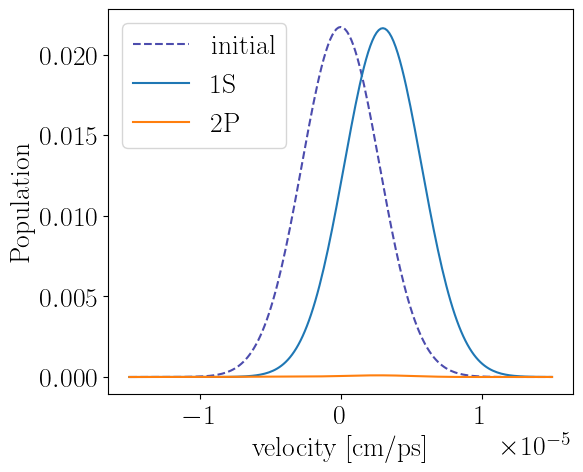

In [82]:


system.organise_result(results[0])
fig,ax = plt.subplots(figsize=(6,5))
#plt.vlines([0,system.velocity_bins[120]],ymin=-0.001,ymax=0.023,color="black")
ax.plot(system.velocity_bins,system.expect["1S"][0],label="initial",ls="dashed",color="darkblue",alpha=0.7)

system.organise_result(results[-1])
print(system.velocity_bins[120])
print(means[-1])
for key in system.expect:
    #if key == "ph.":
    ax.plot(system.velocity_bins,system.expect[key][-1],label=key)

plt.legend(loc="upper left")
plt.xlabel("velocity [cm/ps]")
plt.ylabel("Population")
#plt.savefig("./figures/thesis_draft/acceleration.svg")
plt.show()

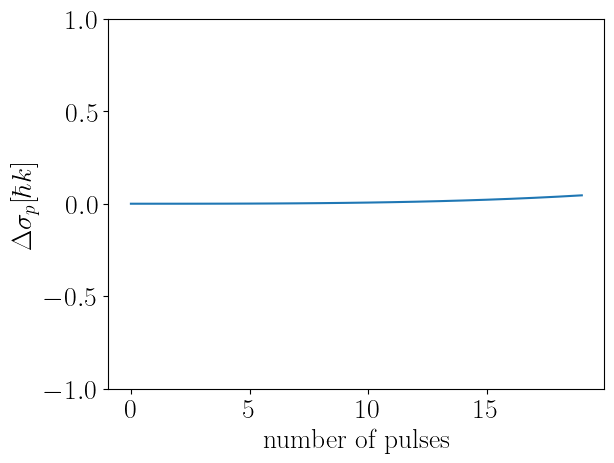

In [81]:
# diff = []
# for i in range(len(stds)):
#     if i == 0:
#         pass
#     diff.append(stds[i]-stds[i-1])
plt.plot(np.arange(len(stds)),stds-stds[0])
#plt.plot(np.arange(len(stds)),diff)
plt.ylabel(r"$\Delta\sigma_p [\hbar k]$")
plt.xlabel("number of pulses")
plt.ylim(-1,1)
#plt.savefig("./figures/thesis_draft/change_in_spread_acc.svg")